Objective: 
 * Predict whether a customer will purchase a product or service based on their:
  1. Demographic and 
  2. Behavioral data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve
import shap

In [2]:
# Find main working repository
import sys 
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [3]:
import scripts.data_preprocessing as dp
import src.visualization as v

Import the Dataset

In [4]:
# Load data
df = pd.read_csv('../data/bank-full.csv', delimiter=';')

Inspect the Data Types and Structure

In [5]:
# View the first few rows:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Check the data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
# Get the shape of data 
df.shape

(45211, 17)

In [9]:
# Summary statistics 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# Check for missing values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
# Identify categorical and numerical data 
categorical_data = df.select_dtypes(include=['object'])
numerical_data = df.select_dtypes(include=['number'])

In [12]:
# Unique values in the categorical data 
print("Categorical data:", categorical_data.columns)
print("Numerical Data:", numerical_data.columns)

Categorical data: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Numerical Data: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [13]:
# Load martial categorical unique values to check
categorical_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [14]:
# Value counts for a categorical data 
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

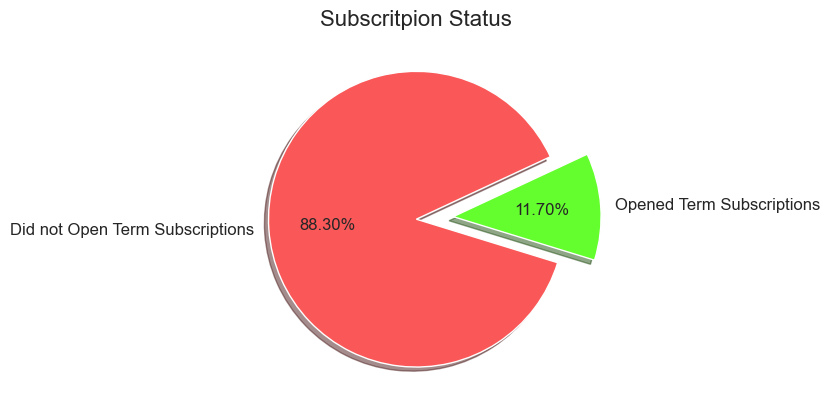

In [15]:
# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define colors and labels
colors = ["#FA5858", "#64FE2E"]
labels = ["Did not Open Term Subscriptions", "Opened Term Subscriptions"]
fig, ax = plt.subplots()

v.plot_pie_chart(df, 'y', ax, colors, labels, 'Subscritpion Status', '')

plt.show()

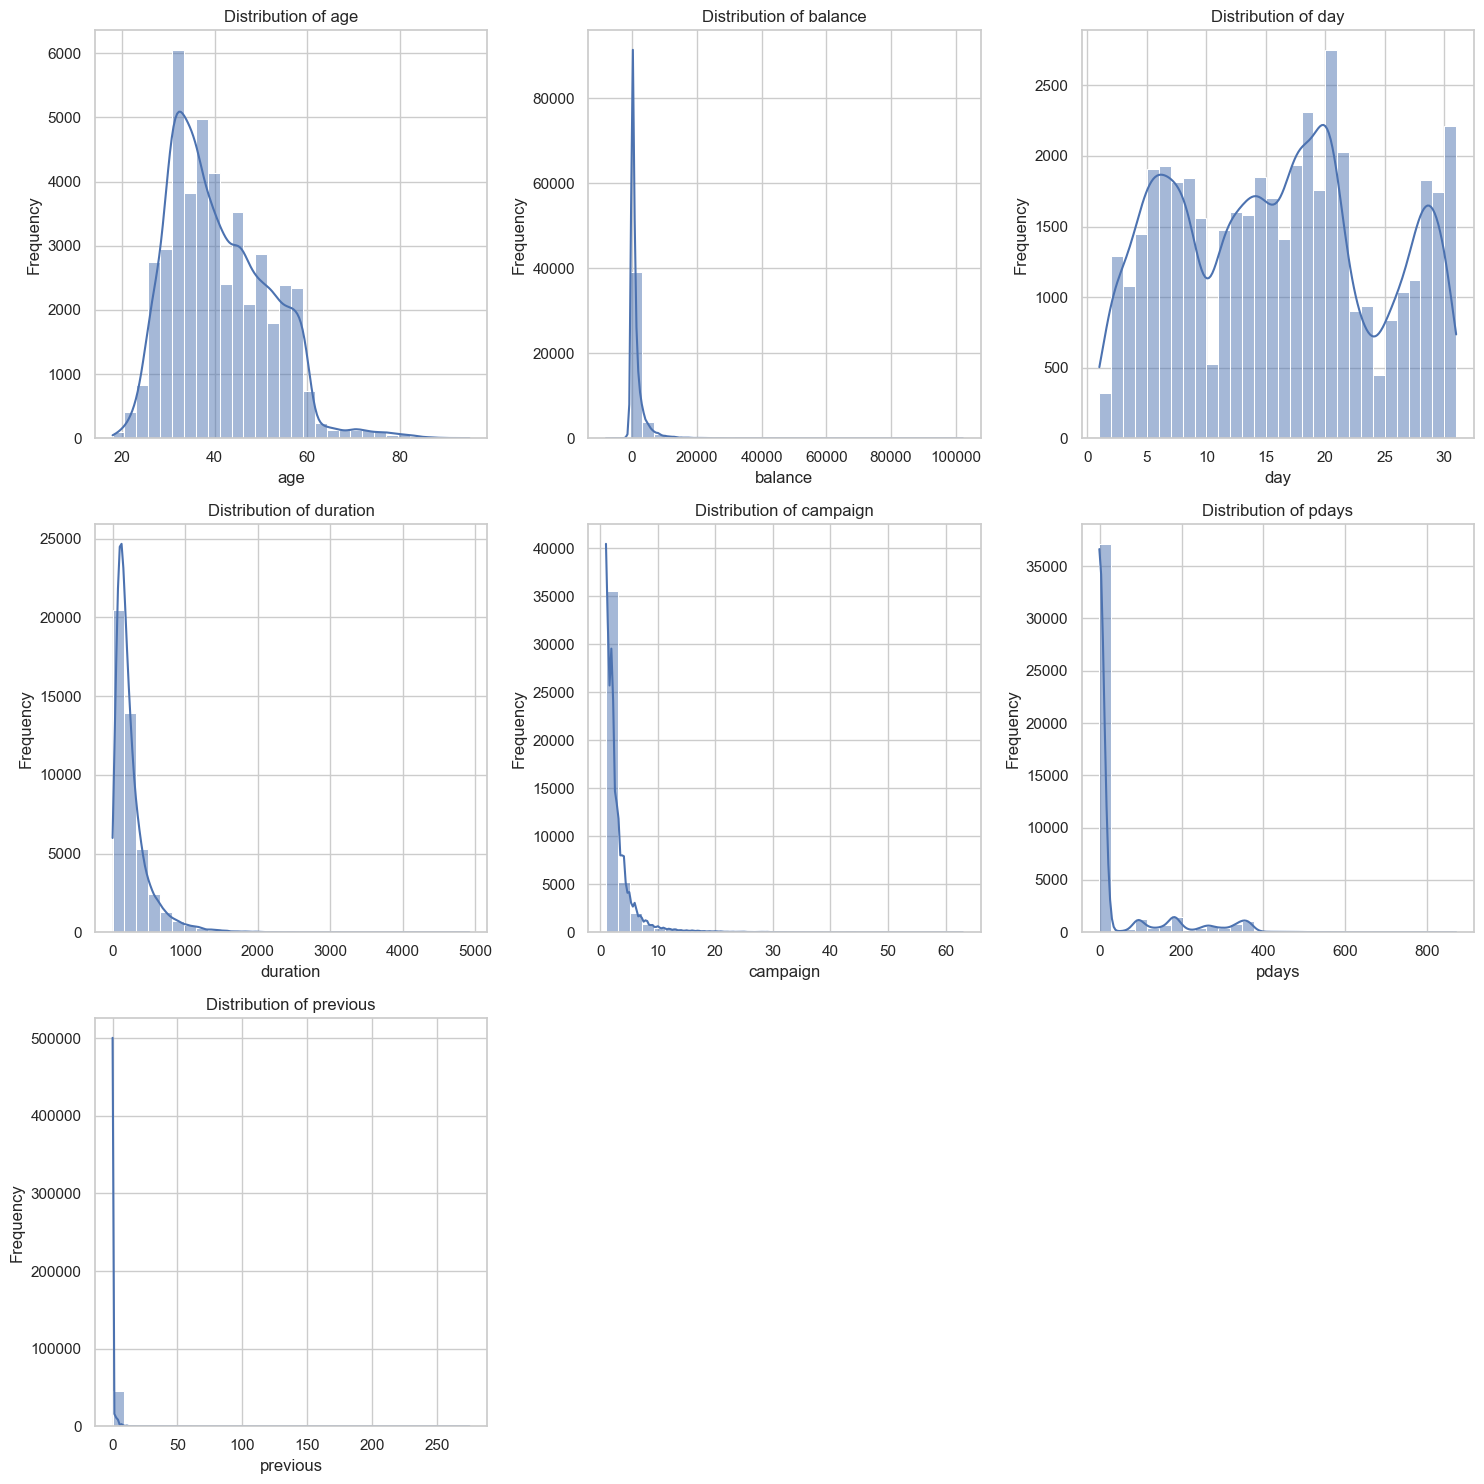

In [16]:
# List of numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

v.numerical_distribution(df, numerical_columns)

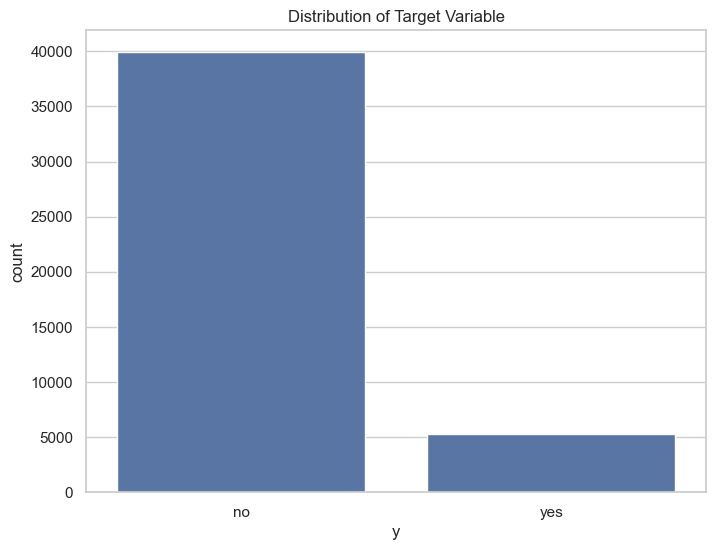

In [17]:
# Distribution of target variable
plt.figure(figsize=(8,6))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()

Convert Categorical variable to numerical variables using label encoder

In [18]:
# Convert categorical variables to numerical variables using LabelEncoder
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

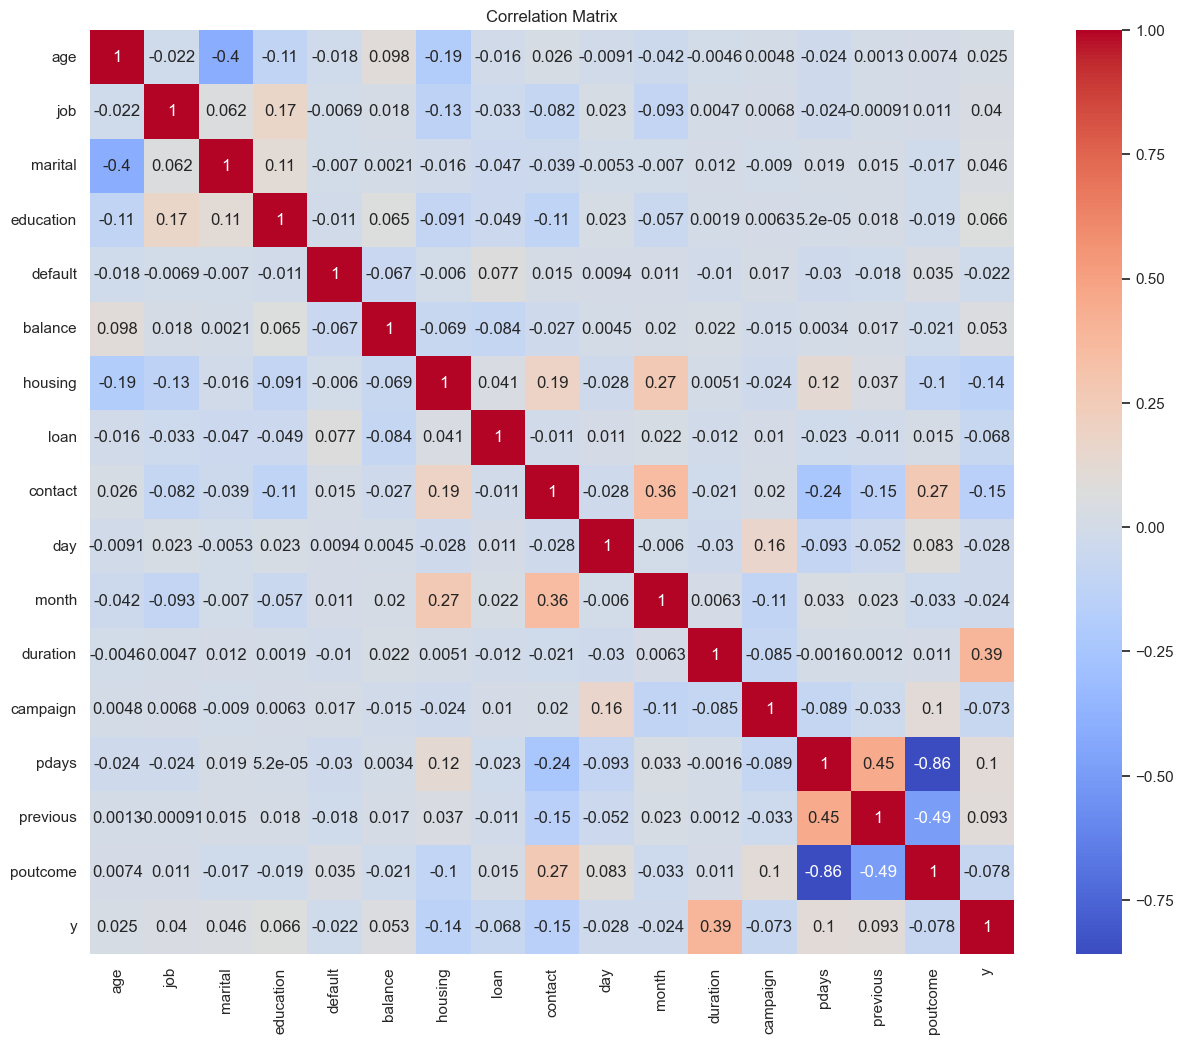

In [19]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

In [20]:
# Create a new feature 'age_group' based on age
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80], labels=['young', 'adult','middle_age', 'old'])

# Convert 'age_group' to numerical variable using LabelEncoder
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

# Create a new feature 'contact_duration' based on 'duration'
df['contact_duration'] = df['duration'] / 60

Splitting Data into Training and Testing Sets

In [21]:
# Split the data into training and testing sets
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hyperparameter Tuning using GridSearchCV

In [25]:
# Define the hyperparameter space for Decision Tree Classifier
param_grid_dt = {'max_depth': [3, 5, 10, 15],'min_samples_split': [2, 5, 10]}

# Perform hyperparameter tuning using GridSearchCV for Decision Tree Classifier
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy for Decision Tree Classifier
print('Best Hyperparameters for Decision Tree Classifier:', grid_dt.best_params_)
print('Best Accuracy for Decision Tree Classifier:', grid_dt.best_score_)

# Define the hyperparameter space for Random Forest Classifier
param_grid_rf = {'n_estimators': [10, 50, 100, 200],'max_depth': [3, 5, 10, 15]}

# Perform hyperparameter tuning using GridSearchCV for Random Forest Classifier
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy for Random Forest Classifier
print('Best Hyperparameters for Random Forest Classifier:', grid_rf.best_params_)
print('Best Accuracy for Random Forest Classifier:', grid_rf.best_score_)

# Train a Decision Tree Classifier with the best hyperparameters
clf_dt = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
clf_dt.fit(X_train, y_train)

# Train a Random Forest Classifier with the best hyperparameters
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_rf.fit(X_train, y_train)

# Evaluate the models
y_pred_dt = clf_dt.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)

print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

c:\Users\Hp\PycharmProjects\HelloWorld\venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters for Decision Tree Classifier: {'max_depth': 10, 'min_samples_split': 10}
Best Accuracy for Decision Tree Classifier: 0.8994138620867304
Best Hyperparameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 200}
Best Accuracy for Random Forest Classifier: 0.9058561310150337
Decision Tree Classifier Accuracy: 0.8922923808470641
Random Forest Classifier Accuracy: 0.900364923144974


Principal Component Analysis (PCA)

Explained Variance Ratio: [0.99173056 0.00715815]


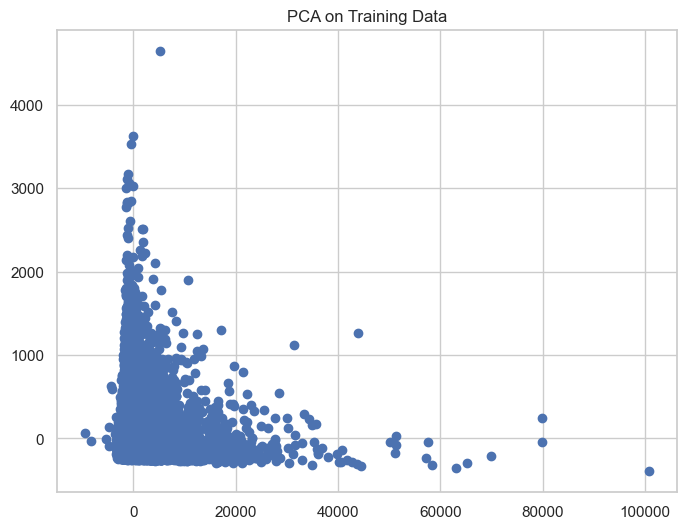

In [26]:
# Perform PCA on the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the training data in the reduced dimensionality space
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.title("PCA on Training Data")
plt.show()

Feature Importances for Random Forest Classifier

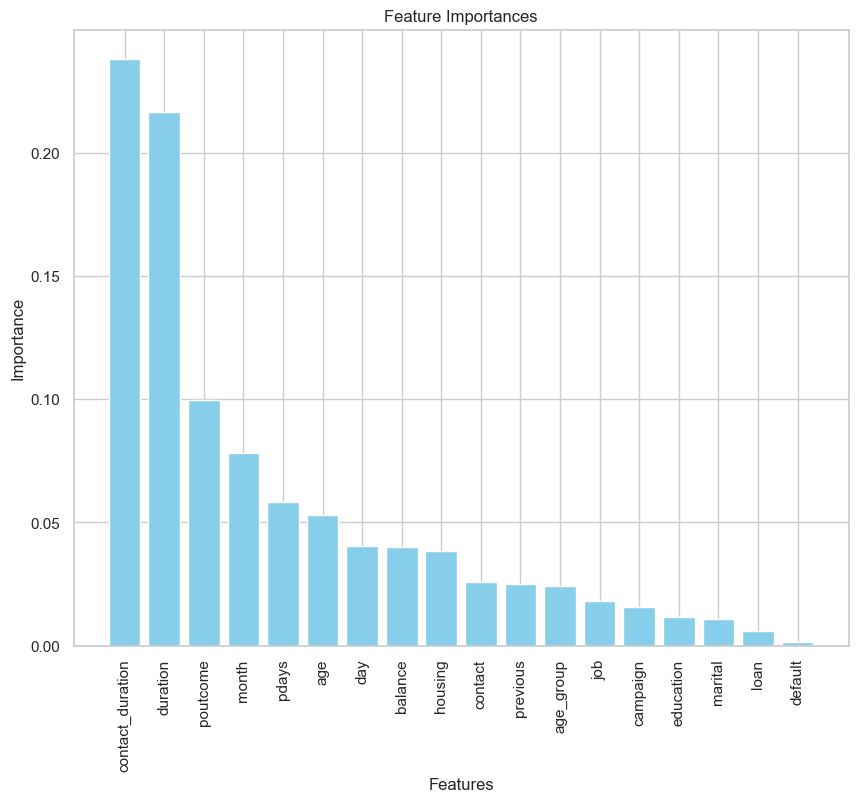

In [44]:
# Get the feature importances
feature_importances_rf = clf_rf.feature_importances_

# Sort the features by importance
indices = np.argsort(feature_importances_rf)[::-1]
sorted_features = X.columns[indices]
sorted_importances = feature_importances_rf[indices]

# Plot the feature importances
plt.figure(figsize=(10,8))
plt.bar(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


Feature Importances for the Decision Tree Classifier

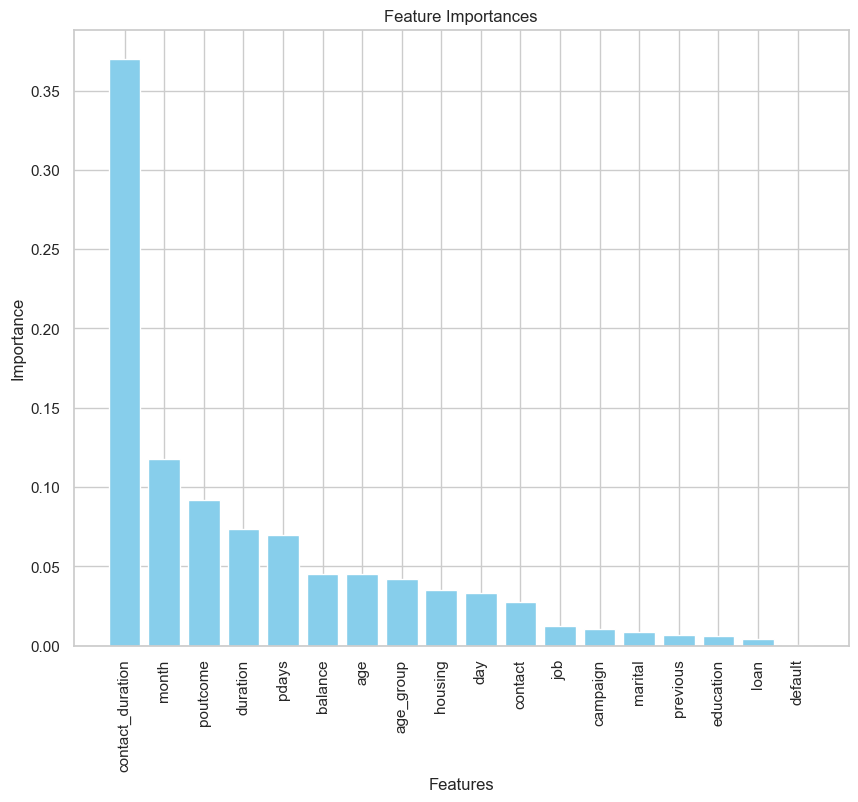

In [43]:
# Get the feature importances for the Decision Tree Classifier
feature_importances_dt = clf_dt.feature_importances_

# Sort the features by importance
indices = np.argsort(feature_importances_dt)[::-1]
sorted_features = X.columns[indices]
sorted_importances = feature_importances_dt[indices]

# Plot the feature importances
plt.figure(figsize=(10,8))
plt.bar(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

Confusion Matrix for Decision Tree Classifier

In [45]:
# Create a confusion matrix for the Decision Tree Classifier
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree Classifier:\n", conf_mat_dt)

# Create a classification report for the Decision Tree Classifier
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree Classifier:\n", class_report_dt)

Confusion Matrix for Decision Tree Classifier:
 [[7619  333]
 [ 641  450]]
Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.57      0.41      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.69      0.71      9043
weighted avg       0.88      0.89      0.88      9043



Confusion Matrix for Random Forest Classifier

In [46]:
# Create a confusion matrix for the Random Forest Classifier
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest Classifier:\n", conf_mat_rf)

# Create a classification report for the Random Forest Classifier
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest Classifier:\n", class_report_rf)

Confusion Matrix for Random Forest Classifier:
 [[7724  228]
 [ 673  418]]
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.38      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



ROC curve for Decission Tree Classifier and Random Forest Classifier

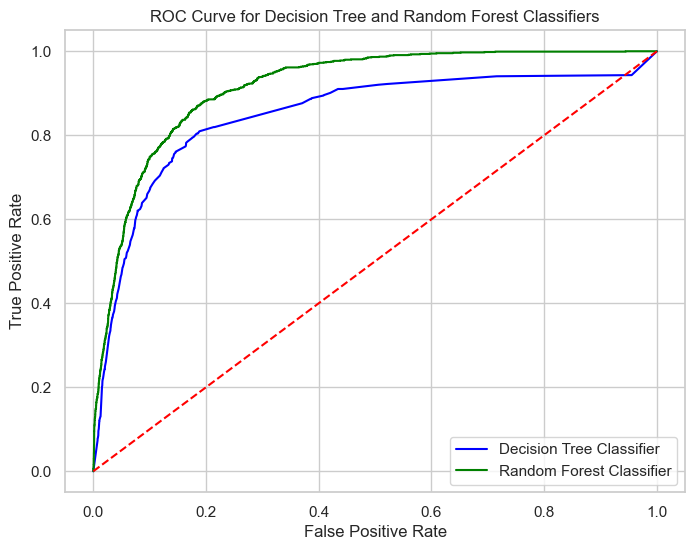

In [52]:
# Plot the ROC curves for both classifiers in one figure
plt.figure(figsize=(8,6))

# Decision Tree Classifier
y_pred_dt_proba = clf_dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)
plt.plot(fpr_dt, tpr_dt, color='blue', label='Decision Tree Classifier')

# Random Forest Classifier
y_pred_rf_proba = clf_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest Classifier')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree and Random Forest Classifiers')
plt.legend()

# Show the plot
plt.show()

AUC Score for Decision Tree Classifier 

In [49]:
# Calculate the AUC score for the Decision Tree Classifier
auc_dt = roc_auc_score(y_test, y_pred_dt_proba)
print("AUC Score for Decision Tree Classifier:", auc_dt)

AUC Score for Decision Tree Classifier: 0.848887781316681


AUC score for the Random Forest Classifier

In [50]:
# Calculate the AUC score for the Random Forest Classifier
auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Score for Random Forest Classifier:", auc_rf)

AUC Score for Random Forest Classifier: 0.9151235322106793
